# The Monty Hall Problem - Sec 03

In [1]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Introduction

The Monty Hall problem is a probability puzzle from *Let's Make a Deal*.
You pick one of three doors (car behind one, goats behind two), the host reveals a goat, and you decide to switch or stay.
We played this in class with envelopes.
This problem is often used in quantitative finance interviews because it tests your ability to think about probabilities (see @crack2024heard).
This notebook explores the Monty Hall problem four ways:

1. **Intuition:** We will use simple logic to understand why switching might be better.
2. **Bayes' Theorem:** We will use a mathematical rule to calculate the exact probabilities.
3. **Class Data:** We will analyze the results from our envelope game in class.
4. **Simulated Data:** We will use Python to simulate the game thousands of times to see the results.

We will show that switching wins $\frac{2}{3}$ of the time, staying wins $\frac{1}{3}$.
I based this notebook on @crack2024heard, @kritzman2000puzzles, and the [Monty Hall problem Wikipedia page](https://en.wikipedia.org/wiki/Monty_Hall_problem).

## Intuition

Let us solve the Monty Hall problem with simple logic.
We will use the same setup as in the introduction:
You pick Door 1, the host opens Door 3 (revealing a goat), and you decide whether to switch to Door 2.
Here are the steps in the intuitive solution:

1. **Initial Choice:**
There are three doors, and the car is equally likely to be behind any one of them.
So, when you pick Door 1, the probability that the car is behind Door 1 is $\frac{1}{3}$.
That means there is a $\frac{2}{3}$ chance the car is behind one of the other two doors (Door 2 or Door 3 combined).
2. **Host Opens a Door:**
The host, who knows where the car is, opens Door 3 and shows it has a goat.
Now we know Door 3 does not have the car.
3. **Probability Transfer:**
Before the host opened Door 3, there was a $\frac{2}{3}$ chance the car was behind Door 2 or Door 3.
Since Door 3 has a goat, that entire $\frac{2}{3}$ probability now belongs to Door 2 (the door you can switch to).
The probability that the car is behind Door 1 (your original choice) is still $\frac{1}{3}$, because nothing has changed about Door 1.

In conclusion:

- If you **switch** to Door 2, your probability of winning is $\frac{2}{3}$.
- If you **stay** with Door 1, your probability of winning is $\frac{1}{3}$.

So, you should switch to Door 2 to have a better chance of winning the car!

## Bayes' Theorem

We can also solve the Monty Hall problem using a mathematical rule called Bayes' Theorem.
Bayes' Theorem helps us calculate the probability of something happening based on new information.
Here, we will use it to find the probability that the car is behind Door 2, given that you picked Door 1 and the host opened Door 3 (revealing a goat).

### Step 1: Define the Events

- Let $B_2$ be the event that the car is behind Door 2 (the door you can switch to).
- Let $H_3$ be the event that the host opens Door 3 (and shows a goat).

We want to find $P(B_2|H_3)$, which is the probability that the car is behind Door 2, given that the host opened Door 3.

### Step 2: Bayes' Theorem Formula

Bayes' Theorem says:
$$
P(B_2|H_3) = \frac{P(H_3|B_2) \times P(B_2)}{P(H_3)}
$$
Let us break down each part:

- $P(H_3|B_2)$:
The probability that the host opens Door 3, given that the car is behind Door 2.
You picked Door 1, so the host must open a door that's not Door 2 (the car) and not Door 1 (your choice).
The only option is Door 3, so $P(H_3|B_2) = 1$.
- $P(B_2)$:
The probability that the car is behind Door 2 before we know anything else.
Since the car is equally likely to be behind any of the three doors, $P(B_2) = \frac{1}{3}$.
- $P(H_3)$:
The total probability that the host opens Door 3.
This is trickier, so let's calculate it carefully.

### Step 3: Calculate $P(H_3)$

We can define $P(H_3)$ as follows:
$$
P(H_3) = [P(H_3|B_1) \times P(B_1)] + [P(H_3|B_2) \times P(B_2)] + [P(H_3|B_3) \times P(B_3)]
$$

The host can open Door 3 in three scenarios, depending on where the car is:

- **Car behind Door 1 ($B_1$):**
Probability $P(B_1) = \frac{1}{3}$.
You picked Door 1, so the host must open a door that's not Door 1 (your choice).
The host randomly picks a door, so $P(H_2|B_1) = P(H_3|B_1) = \frac{1}{2}$.
- **Car behind Door 2 ($B_2$):**
Probability $P(B_2) = \frac{1}{3}$.
We calculate above that $P(H_3|B_2) = 1$.
- **Car behind Door 3 ($B_3$):**
Probability $P(B_3) = \frac{1}{3}$.
But if Door 3 has the car, the host cannot open Door 3, and $P(H_3|B_3) = 0$.

Therefore, we can calculate $P(H_3)$ as follows:
$$
P(H_3) = (\frac{1}{2} \times \frac{1}{3}) + (1 \times \frac{1}{3}) + (0 \times \frac{1}{3}) = \frac{1}{6} + \frac{1}{3} + 0 = \frac{1}{2}
$$

### Step 4: Apply Bayes' Theorem

Now we can plug everything into the formula:
$$
P(B_2|H_3) = \frac{P(H_3|B_2) \times P(B_2)}{P(H_3)} = \frac{1 \times \frac{1}{3}}{\frac{1}{2}} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{1}{3} \times \frac{2}{1} = \frac{2}{3}
$$
This confirms that switching doubles your odds.

### Conclusion

The probability that the car is behind Door 2, given that the host opened Door 3, is $\frac{2}{3}$.
This matches our intuition! You should switch to Door 2 to have a $\frac{2}{3}$ chance of winning, compared to a $\frac{1}{3}$ chance if you stay with Door 1.

## Class Data

Let us look at the results from our envelope game in class.
Here are the data:

In [2]:
data_class = """
Date,Section,Switched,Won
2025-02-07,2,0,1
2025-02-07,3,1,0
2025-02-07,4,0,0
2025-02-11,2,0,1
2025-02-11,3,0,0
2025-02-11,4,0,1
2025-02-18,2,0,0
2025-02-18,3,1,0
2025-02-18,4,0,0
2025-02-21,2,1,1
2025-02-21,3,1,1
2025-02-21,4,1,0
2025-03-14,2,0,0
2025-03-14,3,1,1
2025-03-14,4,1,1
2025-03-21,2,1,1
2025-03-21,3,1,0
2025-03-22,4,0,0
2025-04-01,2,0,0
2025-04-01,3,1,1
2025-04-01,4,0,0
2025-04-04,2,1,0
2025-04-04,3,1,0
2025-04-08,2,1,1
2025-04-08,3,1,1
2025-04-08,4,0,0
"""

In [3]:
df_class = (
    pd.read_csv(
        filepath_or_buffer=io.StringIO(data_class),
        parse_dates=['Date'],
        index_col=['Date']
    )
    .assign(Choice=lambda x: np.where(x['Switched']==1, 'Switch', 'Stay'))
)

We can calculate the fraction of times students won when they switched versus when they stayed.
Let us use Python to do this.

In [4]:
(
    df_class
    .groupby(by='Choice')
    [['Won']]
    .mean()
    .round(4)
)

,Won
Choice,
Stay,0.2500
Switch,0.5714


Our class data supports the idea that switching is better!
Furthermore, these results are close to the theoretical probabilities we calculated:
$\frac{1}{3}$ for staying and $\frac{2}{3}$ for switching.

Let us plot the win rates with a bar chart.
The black lines on each bar show the 95% confidence interval.

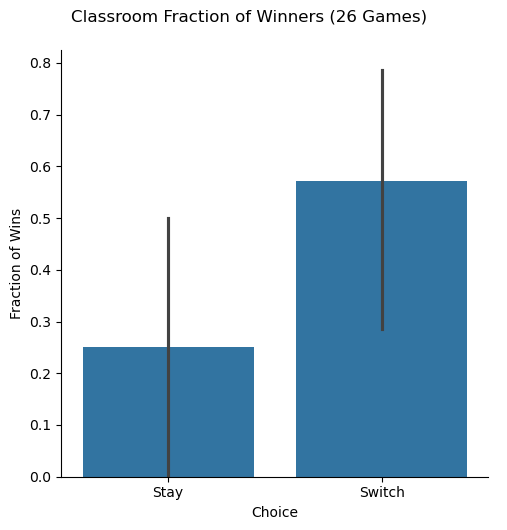

In [5]:
sns.catplot(
    data=df_class,
    x='Choice',
    y='Won',
    kind='bar',
    errorbar=('ci', 95)
)
plt.suptitle(f'Classroom Fraction of Winners ({df_class.shape[0]} Games)', y=1.05)
plt.ylabel('Fraction of Wins')
plt.show()

## Simulated Data

We can simulate as many plays of the game as we want!
The code below simulates 10,000 plays of the game.
For each play, we calculate whether switching or staying wins.
So, for every play, we have both stay and switch outcomes

In [6]:
trials = 10_000
doors = [1, 2, 3]
doors_set = set(doors)

random.seed(42)

df_sim = (
    pd.DataFrame(
        data={
            'Winner': [random.choice(doors) for _ in range(trials)], 
            'Choice_1': [random.choice(doors) for _ in range(trials)], 
            'Open': np.nan,
            'Choice_2': np.nan,
            'Stay': np.nan,
            'Switch': np.nan
        },
        index=pd.RangeIndex(stop=trials, name='Simulation')
    )
    .assign(
        Open=lambda x: [(doors_set - {w, c}).pop() for w, c in x[['Winner', 'Choice_1']].itertuples(index=False)],
        Choice_2=lambda x: [(doors_set - {c, o}).pop() for c, o in x[['Choice_1', 'Open']].itertuples(index=False)],
        Stay=lambda x: x['Choice_1'] == x['Winner'],
        Switch=lambda x: x['Choice_2'] == x['Winner']        
    )
    .melt(
        value_vars=['Switch', 'Stay'],
        var_name='Choice',
        value_name='Won')
)

In [7]:
(
    df_sim
    .groupby(by='Choice')
    [['Won']]
    .mean()
    .round(4)
)

,Won
Choice,
Stay,0.3396
Switch,0.6604


With 10,000 simulations, these results are much more reliable than our class data.
They confirm that switching is the better strategy!

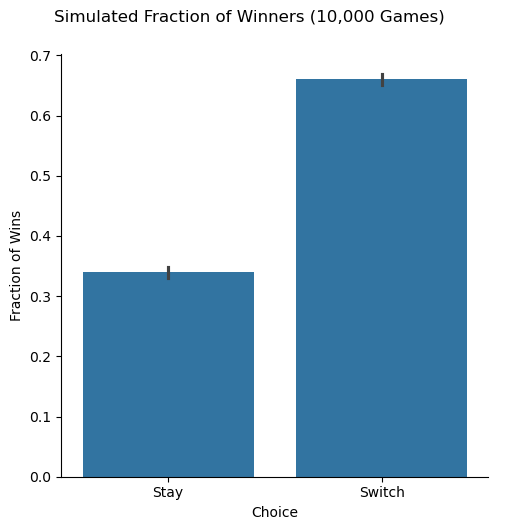

In [8]:
sns.catplot(
    data=df_sim.sort_values(by='Choice'),
    x='Choice',
    y='Won',
    kind='bar',
    errorbar=('ci', 95)
)
plt.suptitle(f'Simulated Fraction of Winners ({trials:,.0f} Games)', y=1.05)
plt.ylabel('Fraction of Wins')
plt.show()

## Conclusion

We explored the Monty Hall problem in four different ways, and they all point to the same conclusion:

- **Intuition:** Switching transfers the $\frac{2}{3}$ probability from the other two doors to the remaining door.
- **Bayes' Theorem:** The probability of winning by switching is $\frac{2}{3}$.
- **Class Data:** Our 26 games showed that switchers won 57% of the time, compared to 25% for stayers.
- **Simulation:** Over 10,000 simulated games, switchers won 67% of the time, compared to 33% for stayers.

All these methods agree: you should always switch in the Monty Hall problem to maximize your chance of winning the car, giving you a $\frac{2}{3}$ probability of success. Staying with your original choice only gives you a $\frac{1}{3}$ chance. So, next time you're on a game show (or playing an envelope game in class), remember to switch!